# Providing link to connect google Drive

In [1]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!ls "/content/drive/My Drive/Dataset/train"

'category 1'  'category 2'  'category 3'  'category 4'


# Importing Necessary module of deep learning

In [0]:
# Imports here
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt

import torch
import numpy as np
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms, models
from PIL import Image
from collections import OrderedDict
import json
import torchvision 
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

import torchvision
import torchvision.transforms as transforms
import pdb

torch.set_printoptions(linewidth=120)
torch.set_grad_enabled(True) 
from torch.utils.tensorboard import SummaryWriter


# Providing Path of Data 

In [0]:
data_dir = "/content/drive/My Drive/Dataset/"
train_dir = data_dir + '/train'
test_dir = data_dir + '/test'
using_gpu = torch.cuda.is_available()

# Loading data in Data set in pytorch with Normalizing data For Train and Test set 

In [0]:
train_set  = torchvision.datasets.ImageFolder(train_dir, 
                                        transform = transforms.Compose([transforms.ToTensor(),
                                        transforms.Normalize([0.485, 0.456, 0.406], 
                                                            [0.229, 0.224, 0.225])])

 )

In [0]:
test_set  = torchvision.datasets.ImageFolder(test_dir , 
                                        transform = transforms.Compose([transforms.ToTensor(),
                                        transforms.Normalize([0.485, 0.456, 0.406], 
                                                            [0.229, 0.224, 0.225])])

 )

# Loading data in Data loader with batch size for Train and Test data set 

In [0]:
train_loader = torch.utils.data.DataLoader(train_set, batch_size=4, shuffle=True)

In [0]:
test_loader = torch.utils.data.DataLoader(test_set, batch_size=100, shuffle=True)

# Defining classes for sub folders 

In [0]:
classes = ('category 1','category 2','category 3','category 4')

# Ploting pictures form train data set

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


category 2 category 3 category 2 category 3


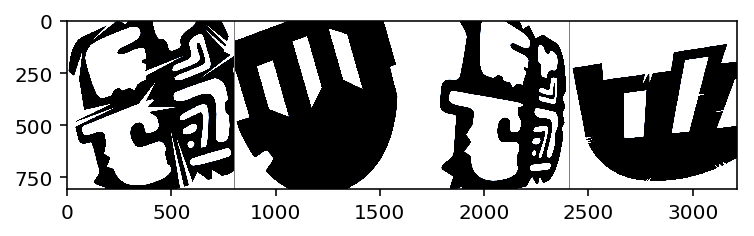

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(train_loader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

# Creating function for Get Num Correct

In [0]:
def get_num_correct(preds, labels):
    return preds.argmax(dim=1).eq(labels).sum().item()


# CNN Architecture

In [0]:
class Network(nn.Module):
    def __init__(self):
        super(Network,self).__init__()
        self.conv1 = nn.Conv2d(3, 6, kernel_size=5)
        self.conv2 = nn.Conv2d(6, 12, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(12*197*197, 120)
        self.fc2 = nn.Linear(120, 60)


    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
    # Torch infers this from other dimensions when one of the parameter is -1.
        x = x.view(-1, 12 * 197 * 197)
        x = F.relu(self.fc1(x))
        x = F.dropout(x)
        x = self.fc2(x)
        return x

In [0]:
network = Network()

In [14]:
for name, param in network.named_parameters():
    print(name,'\t\t',param.shape)

conv1.weight 		 torch.Size([6, 3, 5, 5])
conv1.bias 		 torch.Size([6])
conv2.weight 		 torch.Size([12, 6, 5, 5])
conv2.bias 		 torch.Size([12])
fc1.weight 		 torch.Size([120, 465708])
fc1.bias 		 torch.Size([120])
fc2.weight 		 torch.Size([60, 120])
fc2.bias 		 torch.Size([60])


# For CNN we are using leraning rate = 0.00001 and optimizer Adam 

Learning rate and batch size is defined by using pytorch and Tensor board (Assignment 1)

In [0]:
train_loader = torch.utils.data.DataLoader(train_set, batch_size=40)
optimizer = optim.Adam(network.parameters(), lr=0.00001)
  

# Training a model from scratch 
No of epoch == 100 &
Loss function == Cross Entropy

In [16]:
for epoch in range(100):

    total_loss = 0
    total_correct = 0

    for batch in train_loader: # Get Batch # completed 6000 image in single epoch with 
                               # batch size 100 
        images, labels = batch 

        preds = network(images) # Pass Batch
        loss = F.cross_entropy(preds, labels) # Calculate Loss

        optimizer.zero_grad() # doning zero grad value after every mini batch 
        loss.backward() # Calculate Gradients
        optimizer.step() # Update Weights

        total_loss += loss.item()
        total_correct += get_num_correct(preds, labels)

    print(
        "epoch", epoch, 
        "total_correct:", total_correct, 
        "loss:", total_loss
    )



epoch 0 total_correct: 63 loss: 58.5339560508728
epoch 1 total_correct: 102 loss: 29.74691343307495
epoch 2 total_correct: 115 loss: 28.054674744606018
epoch 3 total_correct: 117 loss: 26.062203288078308
epoch 4 total_correct: 138 loss: 24.790917992591858
epoch 5 total_correct: 137 loss: 24.731898546218872
epoch 6 total_correct: 155 loss: 23.05520486831665
epoch 7 total_correct: 159 loss: 22.407034158706665
epoch 8 total_correct: 187 loss: 21.25768208503723
epoch 9 total_correct: 179 loss: 22.053018927574158
epoch 10 total_correct: 211 loss: 19.948117971420288
epoch 11 total_correct: 206 loss: 19.381755232810974
epoch 12 total_correct: 203 loss: 19.145366609096527
epoch 13 total_correct: 191 loss: 20.30350536108017
epoch 14 total_correct: 222 loss: 18.02234661579132
epoch 15 total_correct: 215 loss: 17.890782713890076
epoch 16 total_correct: 217 loss: 17.970104217529297
epoch 17 total_correct: 223 loss: 18.079862594604492
epoch 18 total_correct: 234 loss: 16.737527906894684
epoch 19 to

# Passing test data in model 

In [0]:
@torch.no_grad() # this function used for setting of the Gradient tracking
def get_all_preds(model, loader):
    all_preds = torch.tensor([])
    for batch in prediction_loader:
        images, labels = batch

        preds = model(images)
        all_preds = torch.cat((all_preds, preds),dim=0)
    return all_preds

# Passing  Test Data  

In [0]:
with torch.no_grad():
    prediction_loader = torch.utils.data.DataLoader(test_set, batch_size=4)
    test_preds = get_all_preds(network, prediction_loader)

In [0]:
import numpy
test_set.targets = torch.from_numpy(numpy.array(test_set.targets, dtype='int64'))

# Printing Result Getting accuracy 96 %

In [20]:
preds_correct = get_num_correct(test_preds, test_set.targets)

print('total correct:', preds_correct)
print('accuracy:', preds_correct / len(test_set)*100)


total correct: 29
accuracy: 96.66666666666667
